<a href="https://colab.research.google.com/github/NatashaGwena/CORE-WEEK-4/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Natasha_Gwena_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis Testing on Bluecar-usage on different types of Days**

## **Overview**
Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 
 

*   Find and deal with outliers, anomalies, and missing data within the dataset.
*   Plot appropriate univariate and bivariate summaries recording our observations.
*  Implement the solution by performing hypothesis testing.
*  This will need to be documented when writing the report. 

Below are the guidelines for creating your report:



**1.   Problem Statement**

Introduce the data you will be describing and the random variable that you are investigating. 
State very precisely the null and alternate hypothesis that you will be testing. 
Provide some explanation for why this hypothesis is important and/or interesting.

**2.   Data Description**

Provide information about the data necessary to understand the rest of the report including a precise statement of the random variable.
Provide a description of the source of your data and the data collection procedures, the descriptive statistics, and some assertions about the model that is consistent with the data. 

**3. Hypothesis Testing Procedure**

Present the details concerning how you will test your hypothesis. 
Describe the logic behind your null and alternate hypotheses -- where did they come from, why are they interesting. 
Describe the test statistic will you use (i.e., z, t, f) and why?  For example, if you are testing a hypothesis about a mean, you have what appears to be normal data, and you have a small n, then you would use a T-test.  When explaining your choice of the test statistic, you need to discuss whether you have satisfied the assumptions necessary for using the specific statistic (e.g., does the statistic require your population to be normal and is it?). 
Determine the alpha level you will use (i.e., 0.01, 0.05).

**4. Hypothesis Testing Results**

Start with the results of your test. 
State the value of the test statistics and the result of the accept/reject decision. 
Identify the p-value of the test.
State what the point estimate is for the parameter
Construct a confidence interval around the parameter.

**5. Discussion of Test Sensitivity**

If you conducted a test on a parameter (e.g., m, p, s), then you might comment on the following:  the practical significance of the finding in the event that your null hypothesis is rejected and the power of the test (1-ß) for the given alpha level and sample size, and the effect of changing the sample size.
If you conducted the goodness of fit test, comment on the effect of different bin sizes, different numbers of bins, and different estimates of the parameters of the hypothesized model.

**6. Summary and Conclusions**

Summarize the process of the project
Provide the concluding statement concerning the hypothesis, the results, and the sensitivity of the testing.




**Dataset**

The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset] and here [Link] respectively.

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

## **1. Problem Statement**

To investigate whether there is a viable difference between Bluecar usage on different day types, for example, weekdays or weekends

## Hypothesis

mu₁: mean of bluecars taken during normal weekdays

mu₂: mean of bluecars taken during the weekends

Null and Alternative hypothesis

Ho: mu₁ = mu₂

H1: mu₁ != mu₂

## **2. Read the Data**

In [22]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random  
from random import sample

In [3]:
# Load the Data from the source
data = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
#Previewing the upper part of the data
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
data_description = pd.read_excel('/content/columns_explanation.xlsx')
data_description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## **3. Check the Data**

In [5]:
# Determining the no. of records in our dataset

print('Shape of dataset:')
print(data.shape)
#Get column names
print('Column names of dataset:')
print(data.columns)
print(data.info)

Shape of dataset:
(16085, 13)
Column names of dataset:
Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')
<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0           

In [6]:
#Check for data types 
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [7]:
#Check for unique attributes from data
data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [8]:
#Basic descriptive statistics for the numeric columns
print('Basic Statistics for Blue Cars Returned:')
print(data['BlueCars_returned_sum'].describe())

print('Basic Statistics for Blue Cars Taken:')
data['BlueCars_taken_sum'].describe()

Basic Statistics for Blue Cars Returned:
count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64
Basic Statistics for Blue Cars Taken:


count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64

## **4. Tidy the Dataset**

In [9]:
#Drop columns
data1 = data.drop(columns=['n_daily_data_points', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'])
data1.shape

(16085, 6)

In [10]:
#Changing column names
data1.rename(columns={'BlueCars_taken_sum':'Bluecars_taken',
                          'BlueCars_returned_sum': 'Bluecars_returned'
                          }, 
                 inplace=True)
data1.head()

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [11]:
#Checking for duplicates and dropping them
data1 = data1.drop_duplicates()
data1.shape

(16085, 6)

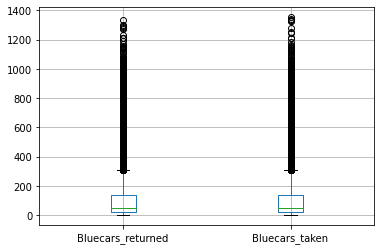

In [13]:
# Checking for Outliers
#Let's start with the Bluecars_taken 
boxplot = data1.boxplot(column=['Bluecars_returned', 'Bluecars_taken'])

In [16]:
#Removing the outliers/anomalies using percentile
#Starting with the Bluecars taken Column
max_threshold = data1['Bluecars_taken'].quantile(0.85)
print(max_threshold)
min_threshold = data1['Bluecars_taken'].quantile(0.15)
print(min_threshold)
data2 = data1[data1['Bluecars_taken']<= max_threshold]
data2 = data1[data1['Bluecars_taken']> min_threshold]
print(data2.shape)

284.0
12.0
(13621, 6)


In [17]:
#Removing the outliers/anomalies in the Bluecars returned Column
max_threshold1 = data2['Bluecars_returned'].quantile(0.85)
print(max_threshold)
min_threshold = data2['Bluecars_taken'].quantile(0.15)
print(min_threshold)
data3 = data2[data2['Bluecars_returned']<= max_threshold1]
data3 = data2[data2['Bluecars_taken']> min_threshold]
print(data3.shape)

284.0
22.0
(11569, 6)


In [18]:
#Converting datatypes
data3['date']= pd.to_datetime(data3['date']) 
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11569 entries, 0 to 16082
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Postal code        11569 non-null  int64         
 1   date               11569 non-null  datetime64[ns]
 2   dayOfWeek          11569 non-null  int64         
 3   day_type           11569 non-null  object        
 4   Bluecars_taken     11569 non-null  int64         
 5   Bluecars_returned  11569 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 632.7+ KB


## **5. Data Sampling**

Stratified sampling is to create two datasets, one for weekends and another for weekdays. After that, simple random sampling is applied with a sample size of 350 and 371 for weekends dataset and weekdays dataset respectively.


In [19]:
#Take two samples one from weekdays and another from weekends
weekdays_df = data3[data3['day_type'] == 'weekday']
weekdays_df.reset_index(drop=True, inplace=True)
weekdays_df.tail()

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
8031,95880,2018-04-02,0,weekday,36,31
8032,95880,2018-05-01,1,weekday,24,25
8033,95880,2018-05-08,1,weekday,31,32
8034,95880,2018-05-21,0,weekday,26,27
8035,95880,2018-06-12,1,weekday,25,25


In [21]:
weekends_df = data3[data3['day_type'] == 'weekend']
weekends_df.reset_index(drop=True, inplace= True)
weekends_df.tail()

,Postal code,date,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned
3528,95880,2018-05-27,6,weekend,37,29
3529,95880,2018-06-02,5,weekend,29,25
3530,95880,2018-06-03,6,weekend,36,33
3531,95880,2018-06-10,6,weekend,34,32
3532,95880,2018-06-17,6,weekend,33,35


In [23]:
#Random sampling for weekdays_df
sample_weekday_df =weekdays_df.sample(n=371,replace="False")
sample_weekday_df.shape

(371, 6)

In [24]:
#Random sampling for weekends_df
sample_weekend_df =weekends_df.sample(n=350,replace="False")
sample_weekend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 3251 to 1257
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Postal code        350 non-null    int64         
 1   date               350 non-null    datetime64[ns]
 2   dayOfWeek          350 non-null    int64         
 3   day_type           350 non-null    object        
 4   Bluecars_taken     350 non-null    int64         
 5   Bluecars_returned  350 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.1+ KB


## **6. Exploratory Analysis**

Univariate Analysis: We will be dealing with numerical variables and we will be checking the following properties:

Mean Median Standard Deviation Kurtosis/skewness distribution/range We will also plot to visualize our data each at a time

In [25]:
#Calculate measures of central tendency for weekday sample dataset
print('Measures of central tendency for sample weekday dataset: ')
df= sample_weekday_df[['Bluecars_returned', 'Bluecars_taken']]
print('Mean is: ')
print(df.mean())
print('Mode is: ')
print(df.mode())
print('Median is: ')
print(df.median())

Measures of central tendency for sample weekday dataset: 
Mean is: 
Bluecars_returned    149.261456
Bluecars_taken       149.552561
dtype: float64
Mode is: 
   Bluecars_returned  Bluecars_taken
0                 29              23
Median is: 
Bluecars_returned    73.0
Bluecars_taken       71.0
dtype: float64


In [26]:
#Get min, max and range
print('Minimum usage is: ')
print(df.min())
print('Maximum usage was is: ')
print(df.max())

Minimum usage is: 
Bluecars_returned    18
Bluecars_taken       23
dtype: int64
Maximum usage was is: 
Bluecars_returned    919
Bluecars_taken       942
dtype: int64


In [27]:
#Calculate quantiles
quantiles = df.quantile([0.25,0.5,0.75])
print(quantiles)

      Bluecars_returned  Bluecars_taken
0.25               40.0            40.0
0.50               73.0            71.0
0.75              177.0           180.0


In [28]:
#Calculating measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())

Skew is: 
Bluecars_returned    1.928707
Bluecars_taken       1.957608
dtype: float64
Kurtosis is: 
Bluecars_returned    3.427172
Bluecars_taken       3.613608
dtype: float64


In [29]:
#Calculate measures of central tendency for weekend sample dataset
print('Measures of central tendency for sample weekend dataset: ')

df= sample_weekend_df[['Bluecars_returned', 'Bluecars_taken']]
df.describe()

Measures of central tendency for sample weekend dataset: 


,Bluecars_returned,Bluecars_taken
count,350.000000,350.000000
mean,198.777143,197.365714
std,242.435332,239.092022
min,14.000000,23.000000
25%,46.250000,49.000000
50%,90.000000,88.000000
75%,255.750000,256.500000
max,1230.000000,1248.000000


In [30]:
#Calculating measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())

Skew is: 
Bluecars_returned    1.986220
Bluecars_taken       2.005539
dtype: float64
Kurtosis is: 
Bluecars_returned    3.713555
Bluecars_taken       3.861857
dtype: float64


**Sample weekday observation:**

* The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is practically the same.

* Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.

**Sample weekend observation:**

* The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is practically the same.

* Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.

* A similar observation can be noted for observations taken during the normal weekdays.

* The mean of Blue car usage is relatively higher during the weekend compared to the weekdays

### **Univariate Analysis**

In [31]:
#Frequency tables
df_swd= sample_weekday_df[['date', 'dayOfWeek','Bluecars_returned', 'Bluecars_taken']]
days = df_swd.groupby('dayOfWeek')
days.Bluecars_taken.value_counts()

dayOfWeek  Bluecars_taken
0          24                4
           23                3
           29                3
           40                3
           38                2
                            ..
4          593               1
           705               1
           746               1
           754               1
           942               1
Name: Bluecars_taken, Length: 299, dtype: int64

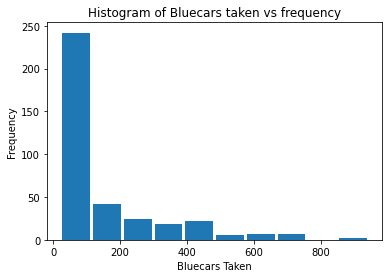

In [32]:
#Plotting a Bluecars taken histogram for weekdays dataset
Bluecars_taken = df_swd['Bluecars_taken']

plt.hist(Bluecars_taken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Bluecars taken vs frequency')
plt.show()
#From the histogram we can see that our data is not normally distributed
#And that most observations are between 0 and 50

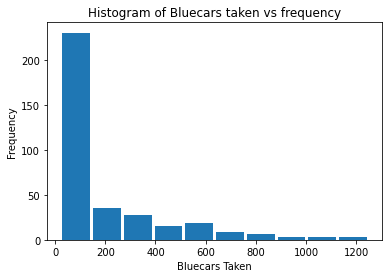

In [33]:
#Plotting a Bluecars taken histogram for weekends dataset
df_sample_weekend= sample_weekend_df[['date', 'dayOfWeek','Bluecars_returned', 'Bluecars_taken']]
Bluecars_taken = df_sample_weekend['Bluecars_taken']

plt.hist(Bluecars_taken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Bluecars taken vs frequency')
plt.show()
#From the histogram we can see that data from the weekends is not normally distributed
#And that most observations of bluecars taken are between 0 and 50

### **Summary**

Observations from both weekdays and weekends are not normally distributed
Most stations rent out cars between 0 and 100 in both occasions

### **Bivariate Analysis**

In [34]:
#Numeric-Numeric Variables
#We will be checking the relationship between bluecars returned and bluecars
# taken for weekends
df= sample_weekend_df[['Bluecars_returned', 'Bluecars_taken']]
df.reset_index(drop=True, inplace= True)
df.head()

,Bluecars_returned,Bluecars_taken
0,44,47
1,975,936
2,596,604
3,53,64
4,128,136


In [35]:
#Calculating correlation
correlation = df.dropna().corr()
correlation

,Bluecars_returned,Bluecars_taken
Bluecars_returned,1.000000,0.998563
Bluecars_taken,0.998563,1.000000


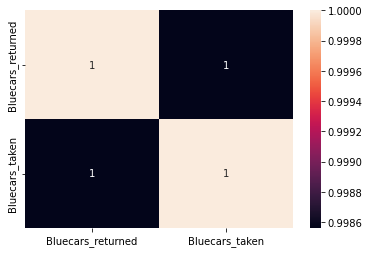

In [36]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is a perfect correlation between bluecars taken and bluecars returned

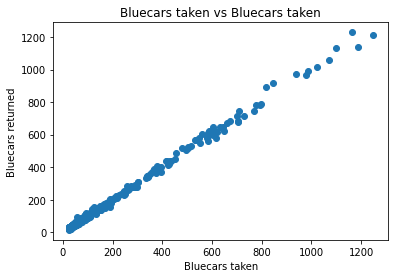

In [37]:
#Plotting scatter plots
plt.scatter(df["Bluecars_taken"] , df["Bluecars_returned"])

# Giving our scatterplot a title
plt.title('Bluecars taken vs Bluecars taken')

# Labelling our x axis
plt.xlabel('Bluecars taken')

# Labelling our y axis
plt.ylabel('Bluecars returned')

# We then display our scatterplot as shown below
plt.show()

###**Summary** 

There is a perfeect correlation between number of bluecars taken and number of bluecars returned during the week and on weekends

# **7. Hypothesis Testing**

In [38]:
#First lets create a new dataframe frame containing sample records of bluecars taken 
data_weekday = sample_weekday_df['Bluecars_taken']
data_weekday.head()

4879     37
6444     41
4547     45
1212    581
1549    421
Name: Bluecars_taken, dtype: int64

In [39]:
#Normality test
#We will use shapiro wilk test to test if numbers of Bluecars taken during the
# week and on weekends are normally distributed
from scipy.stats import shapiro
stat, p = shapiro(data_weekday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.718, p=0.000
Sample does not look Gaussian


In [40]:
#We then create a new dataframe frame containing sample records of bluecars taken 
#from sample_weekend_df
data_weekend = sample_weekend_df['Bluecars_taken']
data_weekend.head()

3251     47
727     936
764     604
1975     64
1278    136
Name: Bluecars_taken, dtype: int64

In [41]:
#Test for normality for bluecars taken during the weekend
from scipy.stats import shapiro
stat, p = shapiro(data_weekend)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.716, p=0.000
Sample does not look Gaussian


Since both datasets do not follow a normal distribution, we reject the use of all parametric tests and consider using non parametric test.

In this case Wilcoxon Signed-Rank Test is used for two paired samples since the samples are drawn from the same population.

The hypothesis as defined earlier:

**Null and Alternative hypothesis**

Ho: mu₁ = mu₂

H1: mu₁ != mu₂

Define our alpha = 0.05

**Asumptions**

To use Wilcoxon Signed-Rank test both dataset x and y need to have the same length and their should be atleast 20 records

In [42]:
#To satisfy the assumptions we will choose another random sample of 50 records from both our datasets
df1 =data_weekday.sample(n=50,replace="False")
df1.shape

(50,)

In [43]:
df2 =data_weekend.sample(n=50,replace="False")
df2.shape

(50,)

In [44]:
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(df1, df2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)')
else:
    print('Mean of bluecars taken during weekdays is different to mean of bluecars taken during the weekend (reject H0)')

Statistics=535.500, p=0.325
Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)


**Interpretation of results**

A Wilcoxon T test was used to analyze the number of blue cars taken during normal weekdays and on weekends to test if there is a significant difference between usage of bluecars on weekdays as compared to weekends. From our results, we can conclude that usage of blue cars is similar on weekends and weekdays. People don’t seem to rent out more bluecars on weekends as claimed by the management of Autolib Carsharing Company.

### **8. Conclusion**

The study shows no significant difference between the number of cars taken during weekdays and during weekends. Going forward, strategic decisions can be made, such as whether to increase the number of cars available on weekends or not from this findings.